## UTS

Mohon maaf pak saya mengumpulkannya link collab, karena ketika saya sudah push ke github dan file uts nya juga udah ada di github tapi tetap tidak muncul di web statis nya

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

## DATA UNDERSTANDING

1. Tujuan Dataset

  Dataset ini bertujuan untuk memprediksi tingkat bertahan hidup pasien yang menderita sirosis hati (Cirrhosis). Sirosis hati adalah kondisi medis yang terjadi ketika jaringan hati mengalami kerusakan permanen dan tergantikan oleh jaringan parut. Tujuan utama dataset ini adalah untuk membantu dalam prediksi apakah seorang pasien akan bertahan hidup atau tidak berdasarkan berbagai parameter medis yang tercatat.

2. Kolom/Keterangan Fitur (Features)

  Berikut adalah deskripsi dari setiap kolom atau fitur dalam dataset ini:

  Age: Umur pasien (numerik), bisa memengaruhi prognosis sirosis hati.

  Gender: Jenis kelamin pasien ("Male" atau "Female").

  Sodium: Kadar natrium dalam darah (numerik), penting untuk keseimbangan cairan.

  Bilirubin: Kadar bilirubin dalam darah (numerik), indikator kesehatan hati.

  Albumin: Kadar albumin dalam darah (numerik), mencerminkan fungsi hati.

  Prothrombin Time: Waktu darah menggumpal (numerik), menunjukkan fungsi hati.

  Ascites: Penumpukan cairan di perut ("Yes" atau "No").

  Hepatomegaly: Pembesaran hati ("Yes" atau "No").

  Spiders: Tanda pembuluh darah di kulit ("Yes" atau "No").

  Edema: Pembengkakan tubuh ("Yes" atau "No").

  Class: Kelas target, 1 = bertahan hidup, 2 = meninggal.



In [ ]:
import pandas as pd

# Melihat bentuk data dan beberapa baris pertama dari X (fitur) dan y (target)
print(X.head())
print(y.head())

# Menampilkan info statistik dari data
print(X.describe())
print(y.value_counts())

# Menampilkan tipe data dan informasi lainnya
print(X.info())


              Drug         Age Sex Ascites Hepatomegaly Spiders Edema  \
0  D-penicillamine 21464.00000   F       Y            Y       Y     Y   
1  D-penicillamine 20617.00000   F       N            Y       Y     N   
2  D-penicillamine 25594.00000   M       N            N       N     S   
3  D-penicillamine 19994.00000   F       N            Y       Y     S   
4          Placebo 13918.00000   F       N            Y       Y     N   

   Bilirubin Cholesterol  Albumin Copper   Alk_Phos      SGOT Tryglicerides  \
0   14.50000         261  2.60000    156 1718.00000 137.95000           172   
1    1.10000         302  4.14000     54 7394.80000 113.52000            88   
2    1.40000         176  3.48000    210  516.00000  96.10000            55   
3    1.80000         244  2.54000     64 6121.80000  60.63000            92   
4    3.40000         279  3.53000    143  671.00000 113.15000            72   

  Platelets  Prothrombin   Stage  
0       190     12.20000 4.00000  
1       221     

## PEMROSESAN AWAL DATA

a. Penanganan Missing values

Kegunaan:

Cek Missing Values: Mengecek apakah ada missing values di fitur-fitur. Jika ada, dilakukan imputasi.

Imputasi: Menggunakan SimpleImputer untuk mengganti missing values dengan median untuk kolom numerik dan modus untuk kolom kategorikal.

Deteksi Outliers: Menggunakan Z-score untuk mendeteksi outliers pada kolom numerik. Jika nilai Z-score lebih dari 3, maka dianggap sebagai outlier.


Tujuan:

Menangani missing values: Agar model tidak terhambat oleh data yang hilang.

Deteksi outliers: Membantu menemukan nilai yang jauh dari distribusi umum dan dapat dipertimbangkan untuk dibuang atau ditangani.

In [ ]:
# Mengecek missing values pada fitur
print("\nMissing values per fitur:")
print(cirrhosis_patient_survival_prediction.data.features.isnull().sum())

# Jika ada missing values, lakukan imputasi
# Gunakan strategi 'most_frequent' untuk kolom non-numerik
from sklearn.impute import SimpleImputer

# Buat imputer untuk data numerik
numerical_imputer = SimpleImputer(strategy="median")

# Buat imputer untuk data kategorikal
categorical_imputer = SimpleImputer(strategy="most_frequent")

# Dapatkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Imputasi missing values untuk kolom numerik
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Imputasi missing values untuk kolom kategorikal
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])


# Cek ulang missing values setelah imputasi
print("\nMissing values setelah imputasi:")
print(X.isnull().sum())

# Deteksi outliers menggunakan IQR atau Z-score (optional, jika perlu)
# Misalnya dengan menggunakan IQR untuk fitur numerik tertentu
from scipy import stats
import numpy as np

# Hanya terapkan Z-score pada kolom numerik
z_scores = np.abs(stats.zscore(X[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)
print(f"\nJumlah outliers di setiap fitur numerik: {outliers}")


Missing values per fitur:
Drug             105
Age                0
Sex                0
Ascites          105
Hepatomegaly     105
Spiders          105
Edema              0
Bilirubin          0
Cholesterol      106
Albumin            0
Copper           106
Alk_Phos           0
SGOT               0
Tryglicerides    106
Platelets          7
Prothrombin        0
Stage              0
dtype: int64

Missing values setelah imputasi:
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

Jumlah outliers di setiap fitur numerik: Age             0
Bilirubin      13
Albumin         2
Alk_Phos       12
SGOT            7
Prothrombin     5
Stage           0
dtype: int64


b. Standarisasi

Kegunaan:

Imputasi Missing Values: Menggunakan median untuk kolom numerik dan modus untuk kolom kategorikal, mengisi nilai yang hilang.

One-Hot Encoding: Mengonversi variabel kategorikal menjadi bentuk numerik (one-hot encoded) agar bisa digunakan oleh model.

Standardisasi: Menggunakan StandardScaler untuk menstandarisasi fitur sehingga memiliki mean 0 dan standar deviasi 1, yang penting untuk beberapa algoritma.

Pemisahan Data: Memisahkan dataset menjadi data pelatihan (train) dan data pengujian (test) dengan stratifikasi untuk menjaga distribusi kelas target yang seimbang.


Tujuan:

Melakukan preprocessing lengkap (imputasi, encoding, standardisasi).

Mempersiapkan data untuk pelatihan model, dengan membagi data menjadi set pelatihan dan pengujian.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Muat data (jika belum)
from ucimlrepo import fetch_ucirepo
cirrhosis = fetch_ucirepo(id=878)
X = cirrhosis.data.features.copy()
y = cirrhosis.data.targets

# 2. Identifikasi kolom numerik vs kategorikal
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# 3. Imputasi
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_num = pd.DataFrame(num_imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)
X_cat = pd.DataFrame(cat_imputer.fit_transform(X[categorical_cols]), columns=categorical_cols)

# 4. One-Hot Encoding untuk kategorikal (dengan sparse_output=True untuk versi terbaru)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = pd.DataFrame(
    encoder.fit_transform(X_cat),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# 5. Gabungkan kembali menjadi X_preprocessed
X_preprocessed = pd.concat([X_num, X_cat_encoded], axis=1)

# 6. Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)
X_scaled = pd.DataFrame(X_scaled, columns=X_preprocessed.columns)

# 7. Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Cek hasil
print("X_preprocessed shape:", X_preprocessed.shape)
print("X_scaled shape:", X_scaled.shape)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y distribution in train:", y_train.value_counts().to_dict())
print("y distribution in test :", y_test.value_counts().to_dict())


X_preprocessed shape: (418, 776)
X_scaled shape: (418, 776)
X_train shape: (334, 776) X_test shape: (84, 776)
y distribution in train: {('C',): 185, ('D',): 129, ('CL',): 20}
y distribution in test : {('C',): 47, ('D',): 32, ('CL',): 5}


c.Pemisahan data train dan test

Kegunaan:

Pemisahan data (train-test split): Memisahkan dataset menjadi 80% data pelatihan (train) dan 20% data pengujian (test), sambil menjaga distribusi kelas target yang seimbang dengan menggunakan stratifikasi.

Menampilkan distribusi kelas pada train dan test: Untuk memastikan bahwa distribusi kelas target konsisten antara data pelatihan dan pengujian.

Tujuan:

Langkah ini digunakan untuk membagi data menjadi dua set: satu untuk melatih model dan satu lagi untuk menguji model yang sudah dilatih.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data menjadi train/test (80:20), dengan stratifikasi pada y (target)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Menampilkan shape data latih dan uji
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train distribution:", y_train.value_counts())
print("y_test distribution:", y_test.value_counts())


X_train shape: (334, 776) X_test shape: (84, 776)
y_train distribution: Status
C         185
D         129
CL         20
Name: count, dtype: int64
y_test distribution: Status
C         47
D         32
CL         5
Name: count, dtype: int64


## PEMODELAN

Akurasi Model: 0.7261904761904762

Classification Report:
              precision  recall  f1-score  support
C               0.71930 0.87234   0.78846 47.00000
CL              0.00000 0.00000   0.00000  5.00000
D               0.74074 0.62500   0.67797 32.00000
accuracy        0.72619 0.72619   0.72619  0.72619
macro avg       0.48668 0.49911   0.48881 84.00000
weighted avg    0.68465 0.72619   0.69944 84.00000

Confusion Matrix:
     C  CL   D
C   41   0   6
CL   4   0   1
D   12   0  20


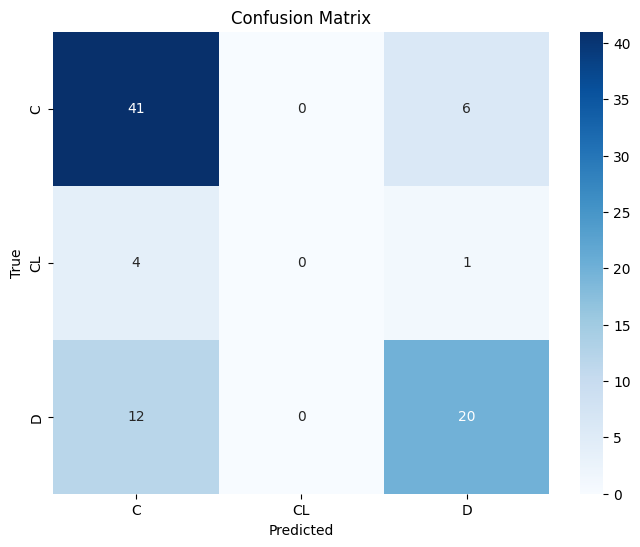

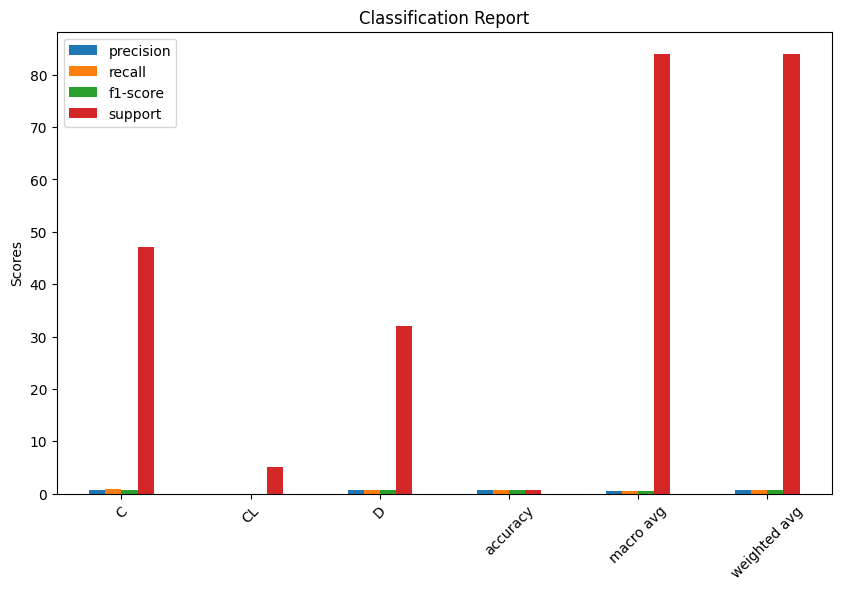

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Jika y_train dan y_test sudah berupa numpy array, cukup lakukan ravel untuk memastikan 1D
y_train = y_train.ravel()
y_test = y_test.ravel()

# Inisialisasi model RandomForest
model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

# Menampilkan Classification Report sebagai tabel dengan presisi lebih tinggi
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
print("\nClassification Report:")
report_df = pd.DataFrame(report).transpose()  # Convert the classification report to DataFrame

# Set format presisi lebih tinggi (5 tempat desimal)
pd.set_option('display.float_format', '{:.5f}'.format)

# Menampilkan tabel classification report
print(report_df)

# Matriks Kebingungannya
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
conf_matrix_df = pd.DataFrame(conf_matrix,
                              columns=model.classes_,
                              index=model.classes_)
print(conf_matrix_df)

# Plotting Confusion Matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting Classification Report (Precision, Recall, F1-score)
# Jika 'accuracy' ada di report, hapus kolom 'accuracy'
if 'accuracy' in report_df.columns:
    report_df = report_df.drop('accuracy', axis=1)

# Plot bar chart untuk Classification Report
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


=== Evaluation on Test Set ===
Akurasi   : 0.7262
Precision : 0.6847 (weighted)
Recall    : 0.7262 (weighted)
F1-Score  : 0.6994 (weighted)
AUC-ROC   : 0.7548 (OvR, weighted, skip empty classes)

=== Classification Report ===
              precision    recall  f1-score   support

           C       0.72      0.87      0.79        47
          CL       0.00      0.00      0.00         5
           D       0.74      0.62      0.68        32

    accuracy                           0.73        84
   macro avg       0.49      0.50      0.49        84
weighted avg       0.68      0.73      0.70        84

=== Confusion Matrix ===
[[41  0  6]
 [ 4  0  1]
 [12  0 20]]


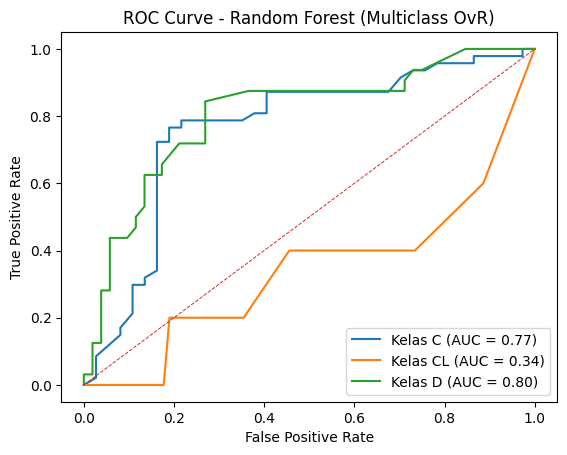

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt
import numpy as np

# 4.1. Latih model terbaik (Random Forest)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# 4.2. Prediksi pada data uji
y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)  # shape (n_samples, n_classes)

# 4.3. Hitung metrik dasar dengan zero_division=0
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# AUC-ROC multiclass (One-vs-Rest, weighted)
# Gunakan y_test binarized untuk OvR, tapi skip kelas tanpa sampel positif di y_test
classes = np.unique(y_test)
# Bangun matriks one-hot untuk y_test
y_test_oh = np.vstack([ (y_test == cls).astype(int) for cls in classes ]).T

auc_dict = {}
for idx, cls in enumerate(classes):
    # Hanya hitung AUC jika ada setidaknya satu positive dan satu negative
    if y_test_oh[:, idx].sum() > 0 and (y_test_oh.shape[0] - y_test_oh[:, idx].sum()) > 0:
        auc_dict[cls] = roc_auc_score(y_test_oh[:, idx], y_proba[:, idx])
    else:
        auc_dict[cls] = None

# Rata-rata AUC (weighted)
valid_aucs = [v for v in auc_dict.values() if v is not None]
auc_weighted = np.average(valid_aucs, weights=[(y_test_oh[:, idx].sum()) for idx, cls in enumerate(classes) if auc_dict[cls] is not None])

print("=== Evaluation on Test Set ===")
print(f"Akurasi   : {acc:.4f}")
print(f"Precision : {prec:.4f} (weighted)")
print(f"Recall    : {rec:.4f} (weighted)")
print(f"F1-Score  : {f1:.4f} (weighted)")
print(f"AUC-ROC   : {auc_weighted:.4f} (OvR, weighted, skip empty classes)")

# 4.4. Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# 4.5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

# 4.6. Plot ROC Curve hanya untuk kelas dengan data positif & negatif
plt.figure()
for idx, cls in enumerate(classes):
    y_true_cls = y_test_oh[:, idx]
    # Skip jika tidak ada positive atau tidak ada negative
    if y_true_cls.sum() == 0 or y_true_cls.sum() == len(y_true_cls):
        continue
    fpr, tpr, _ = roc_curve(y_true_cls, y_proba[:, idx])
    plt.plot(fpr, tpr, label=f"Kelas {cls} (AUC = {auc_dict[cls]:.2f})")

plt.plot([0, 1], [0, 1], '--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multiclass OvR)')
plt.legend(loc='lower right')
plt.show()
